In [1]:
import pandas as pd

In [2]:
resultados_exames = pd.read_csv("exames.csv")

In [3]:
resultados_exames.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


In [4]:
#Veficiando a existencia de dados nulos
resultados_exames.isnull().sum()

id               0
diagnostico      0
exame_1          0
exame_2          0
exame_3          0
exame_4          0
exame_5          0
exame_6          0
exame_7          0
exame_8          0
exame_9          0
exame_10         0
exame_11         0
exame_12         0
exame_13         0
exame_14         0
exame_15         0
exame_16         0
exame_17         0
exame_18         0
exame_19         0
exame_20         0
exame_21         0
exame_22         0
exame_23         0
exame_24         0
exame_25         0
exame_26         0
exame_27         0
exame_28         0
exame_29         0
exame_30         0
exame_31         0
exame_32         0
exame_33       419
dtype: int64

Separando os dados para TREINO e TESTE


In [5]:
#Pegando apenas as colunas "EXAMES"
valores_exames = resultados_exames.drop(columns=["id", "diagnostico"])

#Pegando apenas a coluna "DIAGNOSTICO"
diagnostico = resultados_exames.diagnostico

#Dropando a columa "exame_33" pois é nula
valores_exames_v1 = valores_exames.drop(columns="exame_33")


In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from numpy import random

SEED = 123143 #Definindo o valor de aleatoriedade
random.seed(SEED)


#valor padrão do test_size = 0.25
treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v1, diagnostico, test_size= 0.3)

classificador = RandomForestClassifier(n_estimators=100)
classificador.fit(treino_x, treino_y)
print(f"Resultado da classificação {classificador.score(teste_x, teste_y) * 100 :.2f}%")


#valores_exames -> toda base de dados menos "ID" e "Diagnostico"
#"n_estimator" -> quantidade de árvores de decisão que será construida no modelo
#"score" -> recebe os dados de teste e retorna uma acurácia 

Resultado da classificação 92.40%


In [7]:
print("TREINO_X")
treino_x.head()

TREINO_X


,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,...,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
268,12.87,16.21,82.38,103.78,512.2,0.09425,0.06219,0.03900,0.01615,0.2010,...,23.64,89.27,597.5,0.1256,0.1808,0.1992,0.786,0.0578,0.3604,0.07062
422,11.61,16.02,75.46,103.78,408.2,0.10880,0.11680,0.07097,0.04497,0.1886,...,19.67,81.93,475.7,0.1415,0.2170,0.2302,0.786,0.1105,0.2787,0.07427
168,17.47,24.68,116.10,103.78,984.6,0.10490,0.16030,0.21590,0.10430,0.1538,...,32.33,155.30,1660.0,0.1376,0.3830,0.4890,0.786,0.1721,0.2160,0.09300
501,13.82,24.49,92.33,103.78,595.9,0.11620,0.16810,0.13570,0.06759,0.2275,...,32.94,106.00,788.0,0.1794,0.3966,0.3381,0.786,0.1521,0.3651,0.11830
563,20.92,25.09,143.00,103.78,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,...,29.41,179.10,1819.0,0.1407,0.4186,0.6599,0.786,0.2542,0.2929,0.09873


In [8]:
print("TESTE_X")
teste_x.head()

TESTE_X


,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,...,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
550,10.86,21.48,68.51,103.78,360.5,0.07431,0.04227,0.00000,0.00000,0.1661,...,24.77,74.08,412.3,0.1001,0.07348,0.00000,0.786,0.00000,0.2458,0.06592
405,10.94,18.59,70.39,103.78,370.0,0.10040,0.07460,0.04944,0.02932,0.1486,...,25.58,82.76,472.4,0.1363,0.16440,0.14120,0.786,0.07887,0.2251,0.07732
239,17.46,39.28,113.40,103.78,920.6,0.09812,0.12980,0.14170,0.08811,0.1809,...,44.87,141.20,1408.0,0.1365,0.37350,0.32410,0.786,0.20660,0.2853,0.08496
76,13.53,10.94,87.91,103.78,559.2,0.12910,0.10470,0.06877,0.06556,0.2403,...,12.49,91.36,605.5,0.1451,0.13790,0.08539,0.786,0.07407,0.2710,0.07191
458,13.00,25.13,82.61,103.78,520.2,0.08369,0.05073,0.01206,0.01762,0.1667,...,31.88,91.06,628.5,0.1218,0.10930,0.04462,0.786,0.05921,0.2306,0.06291


In [9]:
print("TESTE_Y")
teste_y.head()

TESTE_Y


550    B
405    B
239    M
76     B
458    B
Name: diagnostico, dtype: object

In [10]:
print("TREINO_Y")
treino_y.head()

TREINO_Y


268    B
422    B
168    M
501    M
563    M
Name: diagnostico, dtype: object

In [11]:
#Utilizando do dummy classifier
from sklearn.dummy import DummyClassifier

SEED = 123143
random.seed(SEED)

classificador_bobo = DummyClassifier(strategy= "most_frequent")
classificador_bobo.fit(treino_x, treino_y)
print(f"Resultado da classificação boba {classificador_bobo.score(teste_x, teste_y) * 100 :.2f}%")

Resultado da classificação boba 66.67%


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

padronizador = StandardScaler()
padronizador.fit(valores_exames_v1)
valores_exames_v2 = padronizador.transform(valores_exames_v1)
valores_exames_v2 = pd.DataFrame(data = valores_exames_v2,
                                columns = valores_exames_v1.keys())



In [13]:
def grafico_violino(valores, inicio, fim):
    dados_plot = pd.concat([diagnostico, valores.iloc[:,inicio:fim]], axis = 1)
    dados_plot = pd.melt(dados_plot, id_vars="diagnostico", 
                 var_name="exames",
                 value_name="valores")

    plt.figure(figsize=(10,10))

    sns.violinplot(x = "exames", y = "valores", 
               hue = "diagnostico", data = dados_plot, split=True)

    plt.xticks(rotation = 90)

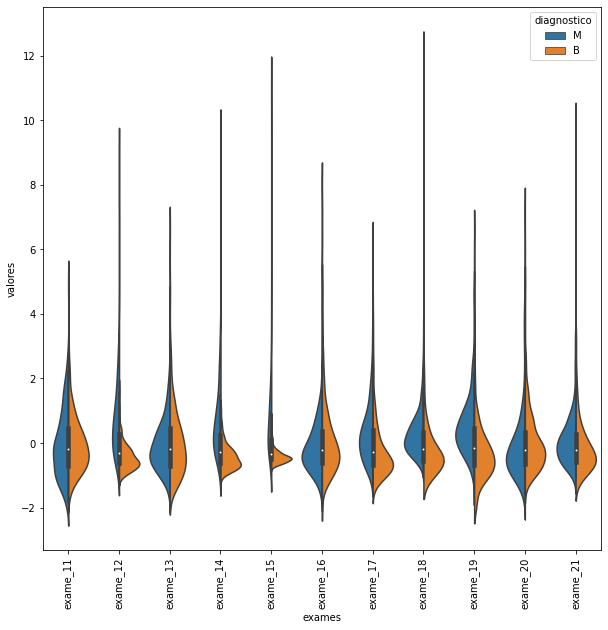

In [14]:
grafico_violino(valores_exames_v2, 10, 21)

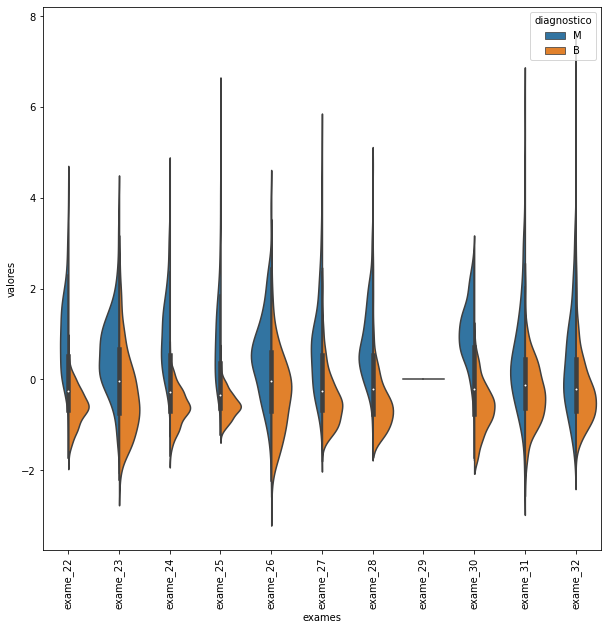

In [15]:
grafico_violino(valores_exames_v2, 21, 32)

In [16]:
valores_exames_v3 = valores_exames_v2.drop(columns=["exame_29", "exame_4"])

def classificar(valores):

    SEED = 1234
    random.seed(SEED)
    treino_x, teste_x, treino_y, teste_y = train_test_split(valores, diagnostico, test_size= 0.3)

    classificador = RandomForestClassifier(n_estimators=100)
    classificador.fit(treino_x, treino_y)
    print(f"Resultado da classificação {classificador.score(teste_x, teste_y) * 100 :.2f}%")

classificar(valores_exames_v3)

    

Resultado da classificação 92.98%


In [17]:
valores_exames_v3

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


Matriz de Correlação.


In [18]:
valores_exames_v3.corr()

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
exame_2,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
exame_3,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
exame_5,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
exame_6,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
exame_7,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
exame_8,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
exame_9,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
exame_10,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
exame_11,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


<AxesSubplot:>

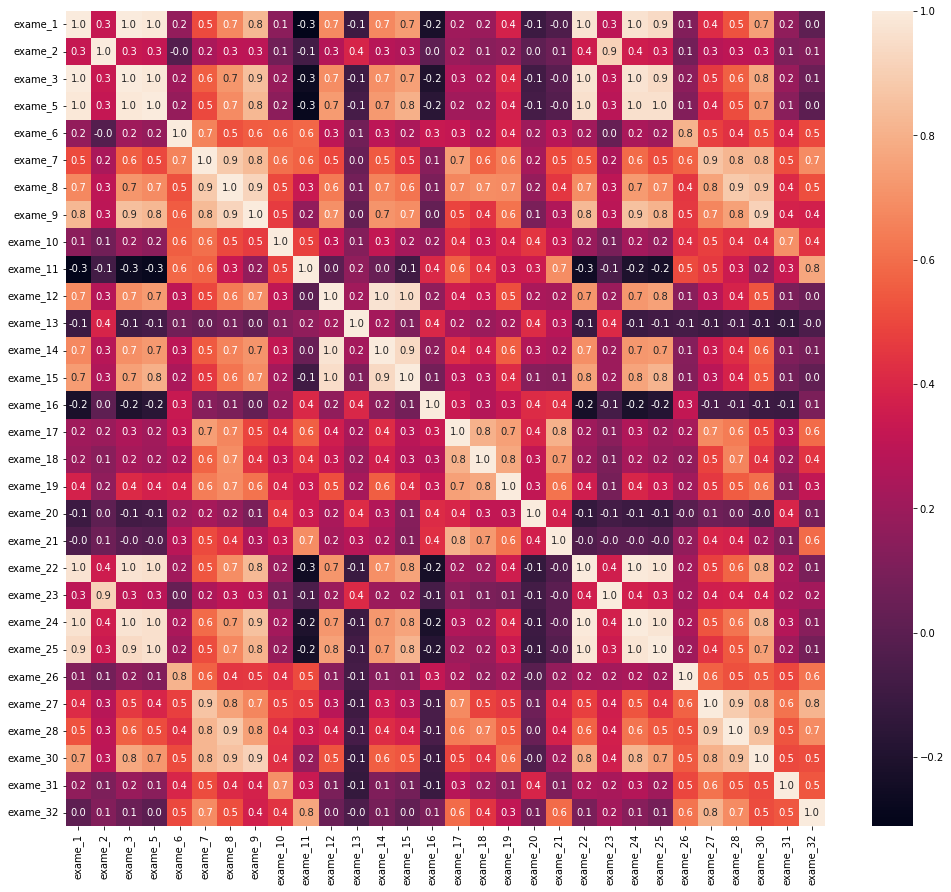

In [19]:
matriz_correlacao = valores_exames_v3.corr()
plt.figure(figsize=(17, 15))
sns.heatmap(matriz_correlacao, annot= True, fmt = ".1f")

In [20]:
matriz_correlacao_v1 = matriz_correlacao[matriz_correlacao>0.99]

In [21]:
matriz_correlacao_v1

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,NaN,0.997855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_3,0.997855,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_6,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_7,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_8,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
matriz_correlacao_v2 = matriz_correlacao_v1.sum()

In [23]:
matriz_correlacao_v2

exame_1     1.997855
exame_2     1.000000
exame_3     1.997855
exame_5     1.000000
exame_6     1.000000
exame_7     1.000000
exame_8     1.000000
exame_9     1.000000
exame_10    1.000000
exame_11    1.000000
exame_12    1.000000
exame_13    1.000000
exame_14    1.000000
exame_15    1.000000
exame_16    1.000000
exame_17    1.000000
exame_18    1.000000
exame_19    1.000000
exame_20    1.000000
exame_21    1.000000
exame_22    1.993708
exame_23    1.000000
exame_24    1.993708
exame_25    1.000000
exame_26    1.000000
exame_27    1.000000
exame_28    1.000000
exame_30    1.000000
exame_31    1.000000
exame_32    1.000000
dtype: float64

In [24]:
variaveis_correlacionadas = matriz_correlacao_v2[matriz_correlacao_v2>1]
variaveis_correlacionadas

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

In [25]:
valores_exames_v4 = valores_exames_v3.drop(columns=variaveis_correlacionadas.keys())

In [26]:
valores_exames_v4.head()

,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,...,exame_20,exame_21,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,...,1.148757,0.907083,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,...,-0.805450,-0.099444,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,...,0.237036,0.293559,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,...,4.732680,2.047511,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,...,-0.361092,0.499328,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [27]:
classificar(valores_exames_v4)

Resultado da classificação 91.81%


In [28]:
valores_exames_v5 = valores_exames_v3.drop(columns=["exame_3", "exame_24"])

In [29]:
classificar(valores_exames_v5)

Resultado da classificação 92.98%


In [30]:
from sklearn.feature_selection import SelectKBest, chi2

#k -> features (exame_1... exame_33)
selecionar_kmelhores = SelectKBest(chi2, k=5)
print(selecionar_kmelhores)

SelectKBest(k=5, score_func=<function chi2 at 0x0000026F83FC5E58>)


In [31]:
valores_exames_v6 = valores_exames_v1.drop(columns=(["exame_4", "exame_29", "exame_3", "exame_24"]))

In [32]:
SEED = 1234
random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, diagnostico, test_size=0.3)

In [33]:
selecionar_kmelhores.fit(treino_x, treino_y)
treino_kbest = selecionar_kmelhores.transform(treino_x)
teste_kbest = selecionar_kmelhores.transform(teste_x)

In [34]:
treino_kbest.shape

(398, 5)

In [35]:
teste_kbest.shape

(171, 5)

In [36]:
#Treinado o modelo com as 5 melhores features
classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_kbest, treino_y)
print(f"Resultado da classificação {classificador.score(teste_kbest, teste_y) * 100 :.2f}%")


Resultado da classificação 92.40%


In [37]:
#Resultado: Reduzimos de 33 features para 5 e tivemos um resultado melhor

In [40]:
resultado_predicao = classificador.predict(teste_kbest)
resultado_predicao

array(['B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'M', 'B',
       'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M',
       'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M',
       'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B',
       'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'M'], dtype=object)

Matriz de Confusão

In [38]:
from sklearn.metrics import confusion_matrix

In [41]:
matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_kbest))

In [42]:
matriz_confusao

array([[100,   5],
       [  8,  58]], dtype=int64)

[Text(0.5, 38.5, 'Predição'), Text(56.5, 0.5, 'Real')]

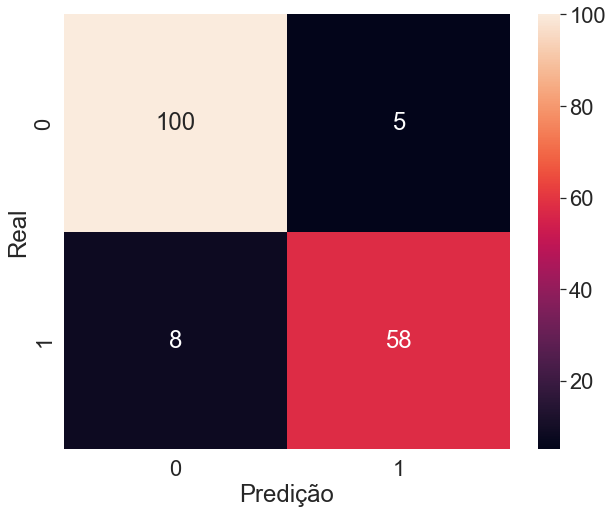

In [45]:
plt.figure(figsize=(10, 8))
sns.set(font_scale = 2)
sns.heatmap(matriz_confusao, annot= True, fmt = "d").set(xlabel = "Predição", ylabel = "Real")

Resultado da classificação com RFE: 90.06%


[Text(0.5, 38.5, 'Predição'), Text(56.5, 0.5, 'Real')]

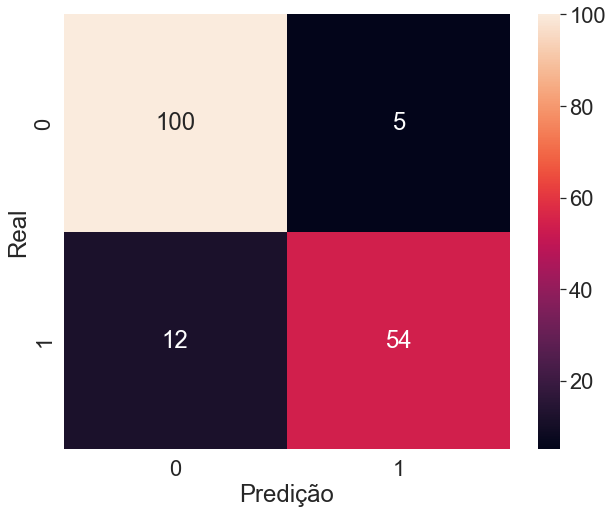

In [47]:
from sklearn.feature_selection import RFE

SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, diagnostico, test_size = 0.3)

selecionador_rfe = RFE(estimator = classificador, n_features_to_select = 5, step = 1)
selecionador_rfe.fit(treino_x, treino_y)
treino_rfe = selecionador_rfe.transform(treino_x)
teste_rfe = selecionador_rfe.transform(teste_x)

classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_rfe, treino_y)
print(f"Resultado da classificação com RFE: {classificador.score(teste_rfe, teste_y) * 100 :.2f}%")


matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfe))

plt.figure(figsize=(10, 8))
sns.set(font_scale = 2)
sns.heatmap(matriz_confusao, annot= True, fmt = "d").set(xlabel = "Predição", ylabel = "Real")
